<a href="https://colab.research.google.com/github/en-genius/Datascience/blob/main/MATERNAL_HEALTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATASCIENCE PROJECT ON MATERNAL HEALTH

##OBJECTIVE
The objective of this project is to develop a model using machine learning that can be used to stratify maternal risk level given certain parameters as specified in the data set obtained from https://archive.ics.uci.edu/ml/datasets/Maternal+Health+Risk+Data+Set.


##BACKGROUND
According to the World health Organization, 850 women died each day in the year 2017 from issues related to pregnacy and child birth. The worst hit regions were low resource settings owning largely to inabilty to access quality healthcare services on time. 

Machine learning offers an innovative approach to model data that can easily be deployed to stratify and triage pregnancies. This tool will no doubt help community health care workers continually monitor key parameters inorder to identify high risk pregancies and refer them to early specialist care. 

##TABLE OF CONTENT

1.   Importing the prerequisite modules
2.   Loading the dataset into a dataframe
3.   Exploratory data analysis  
4.   Data visualization
5.   Data preprocessing 
6.   Modelling
7.   Evaluation
8.   Conclusion

##Importing the prerequisite modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##Loading the dataset into a dataframe

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/MyDrive/Maternal Health Risk Data Set.csv')
df.head(5)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


##Exploratory data analysis

In [ ]:
## Converting the attributes of the dataset into a list
df_array = []
for i in df.columns:
  df_array.append(i)

print(df_array)

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate', 'RiskLevel']


In [ ]:
##Getting the shape of the data
print('The length of the features of the dataset:', df.shape[1])
print('The total number of entries recorded: ', df.shape[0])

The length of the features of the dataset: 7
The total number of entries recorded:  1014


In [ ]:
#Summarize the data using measures of central tendency and dispersion
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
#identifying correlation between the attributes
corr_matrix = df.corr()
corr_matrix['SystolicBP'].sort_values(ascending=False)

SystolicBP     1.000000
DiastolicBP    0.787006
BS             0.425172
Age            0.416045
HeartRate     -0.023108
BodyTemp      -0.286616
Name: SystolicBP, dtype: float64

## Data visualization

In [ ]:
num_attributes = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']


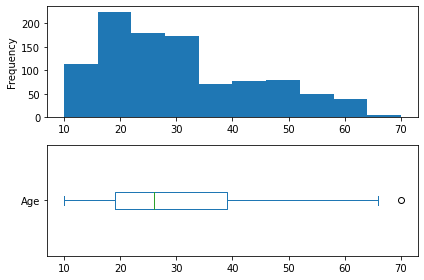

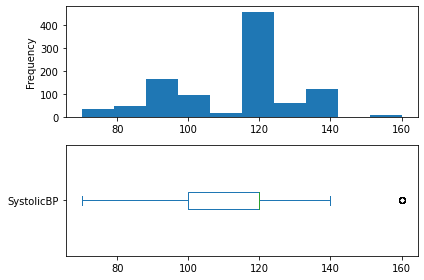

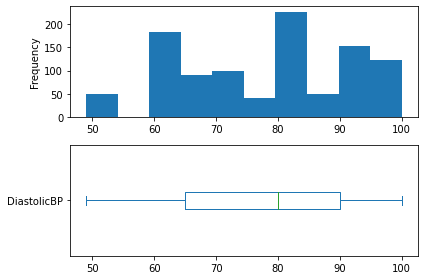

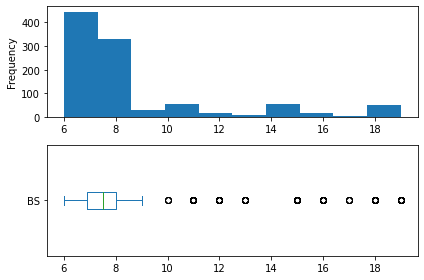

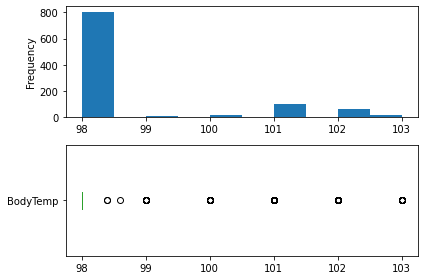

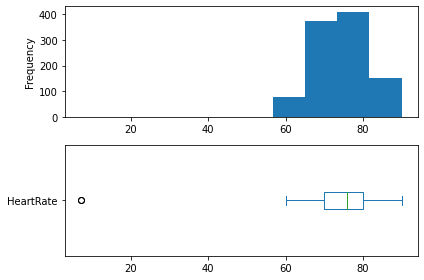

<Figure size 432x288 with 0 Axes>

In [ ]:
#Summarizing the data using boxplot and histogram
attributes = num_attributes
for attr in attributes:
 plt.subplot(2,1,1)
 df[attr].plot.hist()
 plt.subplot(2,1,2)
 df[attr].plot.box(vert=False)
 plt.tight_layout()
 plt.show()
 plt.savefig('{}.png'.format(attr), dpi=400)


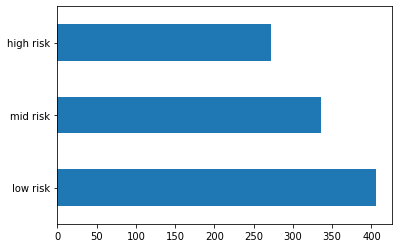

In [ ]:
#NB: The dataset has class imbalance
df['RiskLevel'].value_counts().plot.barh()

In [ ]:
df["SystolicBin"] = pd.cut(df["SystolicBP"],
 bins=[90, 120, 150, np.inf],
 labels=[1, 2, 3])

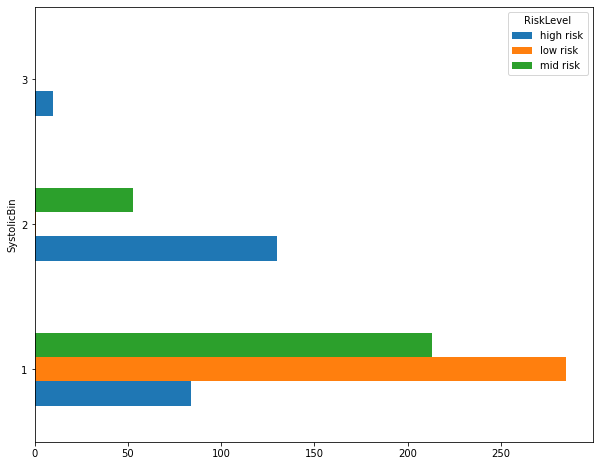

In [ ]:
df.groupby(['SystolicBin','RiskLevel']).size().unstack().plot.barh(figsize=(10,8))
plt.show()

##Data preprocessing

In [ ]:
#Check for missing values in the dataset
df.isnull().sum()

Age              0
SystolicBP       0
DiastolicBP      0
BS               0
BodyTemp         0
HeartRate        0
RiskLevel        0
SystolicBin    238
dtype: int64

In [ ]:
feature_df = df[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
X = np.asarray(feature_df)
X[0:5]

array([[ 25. , 130. ,  80. ,  15. ,  98. ,  86. ],
       [ 35. , 140. ,  90. ,  13. ,  98. ,  70. ],
       [ 29. ,  90. ,  70. ,   8. , 100. ,  80. ],
       [ 30. , 140. ,  85. ,   7. ,  98. ,  70. ],
       [ 35. , 120. ,  60. ,   6.1,  98. ,  76. ]])

In [ ]:
y = df['RiskLevel']
y [0:5]

0    high risk
1    high risk
2    high risk
3    high risk
4     low risk
Name: RiskLevel, dtype: object

##Modelling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
model = RandomForestClassifier()

##Obtain the best training parameters from a subset hyperparameters before building a model
try:
    param_grid=[{'n_estimators':[120, 140, 160, 180, 190], 'max_features':[2, 4, 6, 8, 10]}]
    grid_search = GridSearchCV(model, param_grid,cv=7, scoring='balanced_accuracy', return_train_score=True)
    grid_search.fit(X_train, y_train)

except Exception as e:
    print(e)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 175.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

In [ ]:
final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(max_features=2, n_estimators=120)

##Evaluation

In [ ]:
#Evaluating the model on the test set
final_predictions = final_model.predict(X_test)
print(classification_report(y_test, final_predictions, labels=['low risk', 'mid risk','high risk']))

              precision    recall  f1-score   support

    low risk       0.89      0.80      0.84        79
    mid risk       0.72      0.90      0.80        60
   high risk       0.96      0.86      0.91        64

    accuracy                           0.85       203
   macro avg       0.86      0.85      0.85       203
weighted avg       0.86      0.85      0.85       203



##Conclusion

The model performed really well with a precision of 86% , recall of 85% and f1 score 85%

##Author

Anthony Ukwenya